By Prof. Dr.-Ing. Jürgen Brauer, http://www.juergenbrauer.org

# Load in the dataset

The dataset used for this Jupyter notebook is called

**"Women's E-Commerce Clothing Reviews"**

and consists of 23,486 customer reviews and ratings.

You can download it from Kaggle [here](https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews).

Each row corresponds to a customer review, and includes the following 10 columns:

  * **Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.
  * **Age:** Positive Integer variable of the reviewers age.
  * **Title:** String variable for the title of the review.
  * **Review Text:** String variable for the review body.
  * **Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
  * **Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
  * **Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.
  * **Division Name:** Categorical name of the product high level division.
  * **Department Name:** Categorical name of the product department name.
  * **Class Name:** Categorical name of the product class name.


In [1]:
import pandas as pd
filename = "produktbewertungen.csv"
table = pd.read_csv( filename )

In [2]:
table

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


What we want to do is to infer the Rating column from the text column:

In [3]:
reviews = table["Review Text"].tolist()
ratings = table["Rating"].tolist()

print("type of reviews is", type(reviews))
print("type of ratings is", type(ratings))

print("type of a single review is", type(reviews[0]))
print("type of a single rating is", type(ratings[0]))

print("\nExample #1:")
print(reviews[0], "-->", ratings[0])

print("\nExample #2:")
print(reviews[23478], "-->", ratings[23478])


type of reviews is <class 'list'>
type of ratings is <class 'list'>
type of a single review is <class 'str'>
type of a single rating is <class 'int'>

Example #1:
Absolutely wonderful - silky and sexy and comfortable --> 4

Example #2:
I was surprised at the positive reviews for this product. its terrible! it cuts you in a weird place to make you look wide. the skirt is also not like the picture. its darker and heavier. the material isnt great. i had to return. --> 1


No we will have later some problems, if words as

  - Nice
  - nice
  - nice,
  - nice!  
  
will be treated as different words. For this we can use gensim's simple text preprocssing functionality:

In [4]:
import gensim

print( gensim.utils.simple_preprocess ("Hello, THIS is some test line!") )
print( gensim.utils.simple_preprocess ("\nHello, tHiS Is some\t test line!\n") )

['hello', 'this', 'is', 'some', 'test', 'line']
['hello', 'this', 'is', 'some', 'test', 'line']


# Training a word embedding using word2vec

Now we will use the word2vec implementation from [gensim](https://radimrehurek.com/gensim/) in order to train a new word embedding that is suitable for our words/text.


First, we have to make sure, that each review is a list of words and not a string, since this is expected from gensim's Word2Vec as input.

In [5]:
some_str = "I am a long long long string."
print( some_str.split() )

nr_reviews = len(reviews)
print("There are", nr_reviews, "many reviews.")

reviews_as_lists_of_words = []
for i in range(nr_reviews):
    rev = reviews[i]
    
    # Some review texts are empty and
    # Pandas uses then as data type "float"
    if not isinstance(rev, str):
        rev = ""
    
    # to lower case, remove escape sequences, remove commas and periods
    # AND
    # return not a string, but a list of words!
    single_review_as_list_of_words = gensim.utils.simple_preprocess( rev )
    
    reviews_as_lists_of_words.append( single_review_as_list_of_words )

print(reviews_as_lists_of_words[0])

['I', 'am', 'a', 'long', 'long', 'long', 'string.']
There are 23486 many reviews.
['absolutely', 'wonderful', 'silky', 'and', 'sexy', 'and', 'comfortable']


In [6]:
EMBEDDED_VECTOR_DIM = 150
CONTEXT_WINDOW_SIZE = 10
NR_TRAIN_EPOCHS = 10

import gensim 
wordmodel = gensim.models.Word2Vec (reviews_as_lists_of_words,
                                size=EMBEDDED_VECTOR_DIM,
                                window=CONTEXT_WINDOW_SIZE,
                                min_count=1,
                                workers=10)
wordmodel.train(reviews_as_lists_of_words,
                total_examples=len(reviews_as_lists_of_words),
                epochs=NR_TRAIN_EPOCHS)
wordmodel.save("your_word_model.model")

# Some sanity checks with our word embedding

Let's see whether the word vectors that we have learned make roughly sense.

What are words considered as most similair to nice?

In [7]:
w1 = "nice"
wordmodel.wv.most_similar (positive=w1, topn=15)

[('good', 0.6222252249717712),
 ('great', 0.6218503713607788),
 ('wonderful', 0.5604586601257324),
 ('fabulous', 0.5403447151184082),
 ('lovely', 0.5238939523696899),
 ('fantastic', 0.5073368549346924),
 ('light', 0.4915662109851837),
 ('jacquard', 0.4514104127883911),
 ('pretty', 0.44627463817596436),
 ('avergage', 0.4431700110435486),
 ('excellent', 0.4312971234321594),
 ('smooth', 0.4312502145767212),
 ('substantial', 0.4300740659236908),
 ('beautiful', 0.4288889169692993),
 ('perfect', 0.42464226484298706)]

What are words considered as similar to "dress"?

In [8]:
w1 = "dress"
wordmodel.wv.most_similar (positive=w1)

[('romper', 0.5891741514205933),
 ('skirt', 0.5677682161331177),
 ('jumpsuit', 0.55530846118927),
 ('swimsuit', 0.5285894870758057),
 ('top', 0.5236107110977173),
 ('blouse', 0.4833352267742157),
 ('piece', 0.452787846326828),
 ('wedding', 0.44175517559051514),
 ('suit', 0.42936405539512634),
 ('jumper', 0.41757842898368835)]

What are words considered as similar to "elegant"?

In [9]:
w1 = "elegant"
wordmodel.wv.most_similar (positive=w1)

[('classy', 0.8278968334197998),
 ('sophisticated', 0.716463029384613),
 ('chic', 0.7083356976509094),
 ('romantic', 0.666622519493103),
 ('effortless', 0.6549191474914551),
 ('bohemian', 0.6484301090240479),
 ('feminine', 0.6337804794311523),
 ('stylish', 0.6089857816696167),
 ('sexy', 0.6022568941116333),
 ('classic', 0.5979175567626953)]

Get some vectors and play a little bit with them:

In [10]:
vec_nice = wordmodel["nice"]
print(vec_nice)
print("Shape of vec_nice is", vec_nice.shape)

[-0.55794805  3.2694407   0.16553666 -1.2091459  -0.7304475  -1.53515
 -1.4283302  -2.0727942  -0.73932743 -3.4050498   1.1890491   0.9677051
 -0.65841067  0.26415735 -0.07479114 -0.41697848 -0.5987646  -0.91773957
  1.5866487   0.7581006   0.3038536  -1.6594889   2.8520114   1.7569945
  0.21016447 -1.7710043  -0.52574295 -1.2346995  -0.8970529  -2.325719
  2.6720257   3.3680732  -1.1971058   2.550115    1.2635094   0.69887936
 -0.4347923   2.8848739   2.2022245   0.5888121  -1.9034584  -2.2522545
 -1.3247584   0.22784592 -3.2799656   1.8455524   0.8136877   2.6375792
 -1.092729   -0.05050219 -0.02070649  1.4720976   2.370574    2.5714357
  0.3303356   2.6223726  -0.47898963  4.0460186   0.05938768  0.6307582
  1.6720892   2.2266588   0.8749312  -1.0896747   2.420996   -1.9835606
 -2.31568     0.35624397  0.00630749 -1.2240233   1.1348449   1.1633221
  0.492213   -3.278445    2.4589984   0.1585826  -1.2814523  -3.2506769
 -1.4702188  -1.0559891  -0.37771904  1.1699936   1.0233893  -0.1

/tmp/ipykernel_21672/83220087.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  vec_nice = wordmodel["nice"]


# What are the lengths of the reviews?

The reviews have different lengths. That's clear. But, how different are there. Let us produce a histogram of the different lengths.

In [22]:
length_per_review = []
for review_as_list_of_word in reviews_as_lists_of_words:
    length_per_review.append( len(review_as_list_of_word) )
print("length_per_review=", length_per_review[:100])

length_per_review= [7, 51, 89, 19, 36, 89, 89, 92, 29, 60, 65, 8, 92, 65, 89, 89, 67, 52, 27, 51, 52, 92, 77, 36, 84, 60, 92, 45, 30, 78, 17, 59, 18, 75, 48, 16, 27, 62, 15, 23, 25, 42, 44, 86, 67, 39, 35, 10, 16, 45, 63, 28, 9, 86, 76, 35, 74, 27, 91, 48, 53, 85, 36, 22, 12, 43, 87, 89, 67, 50, 82, 90, 90, 46, 94, 88, 51, 36, 46, 76, 90, 10, 85, 91, 93, 93, 68, 91, 20, 70, 70, 75, 0, 0, 87, 82, 43, 31, 0, 83]


Now the histogram of the review lengths (in words):

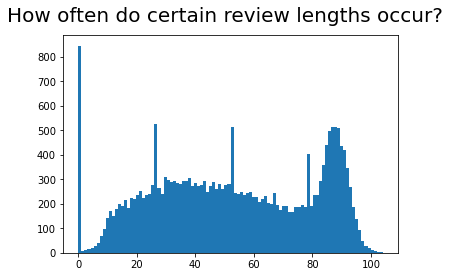

In [23]:
import matplotlib.pyplot as plt

plt.hist(length_per_review, bins=100)
plt.suptitle("How often do certain review lengths occur?", fontsize=20)
plt.show()

# Preparing the training data

For a given review (a sequence of words), we now want to have a sequence of word vectors. Then we have an appropriate input for our LSTM.

In [25]:
import numpy as np

REVIEW_LENGTH = 100

nr_samples =len(reviews_as_lists_of_words)
nr_features = EMBEDDED_VECTOR_DIM
nr_time_steps = REVIEW_LENGTH

def to_sequence_data():
    dataX, dataY = [], []
    
    for review_nr in range( nr_samples ):
        
        # get the next review as a list of words
        review = reviews_as_lists_of_words[review_nr]
        
        # create a matrix M
        # for each time step we have one line with a 100 (review-length) x 150-dim word-vector
        M = np.zeros( nr_time_steps*nr_features )
        
        pos = 0
        for word_nr in range( min(REVIEW_LENGTH,len(review)) ):
            
            # get the next word from the review
            word = review[word_nr]
            
            # get the corresponding word vector from gensim
            word_vec = wordmodel[word]
            
            # copy the word-vector to the matrix
            M[pos:pos+nr_features] = word_vec
            pos += nr_features
        
        # put matrix M to the list of input samples        
        dataX.append( M )
                
        # put the rating of this review to list of desired outputs
        dataY.append( ratings[review_nr] )
        
    return np.array(dataX), np.array(dataY)

dataX, dataY = to_sequence_data()

/tmp/ipykernel_21672/697222449.py:28: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  word_vec = wordmodel[word]


In [26]:
nr_training_samples = dataX.shape[0]
print("I have generated", nr_training_samples, "training samples.")

print("Shape of trainX is", dataX.shape)
print("Shape of trainY is", dataY.shape)

print("\n",dataX[0], "-->", dataY[0])

I have generated 23486 training samples.
Shape of trainX is (23486, 15000)
Shape of trainY is (23486,)

 [ 0.03837964 -1.45931387  1.6672287  ...  0.          0.
  0.        ] --> 4


# Retention of some test data

In [27]:
RATIO_TO_USE_FOR_TRAIN = 0.8

nr_train_samples = int(dataX.shape[0]*RATIO_TO_USE_FOR_TRAIN)
nr_test_samples = dataX.shape[0]-nr_train_samples

trainX = dataX[0:nr_train_samples]
testX = dataX[nr_train_samples:]

trainY = dataY[0:nr_train_samples]
testY = dataY[nr_train_samples:]

print("There are", trainX.shape[0],"many review samples for training.")
print("There are", testX.shape[0],"many review samples for testing.")

There are 18788 many review samples for training.
There are 4698 many review samples for testing.


# Building and training the model



In [42]:
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.Dense(100, input_shape=(nr_time_steps*nr_features,)))
model.add(keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')    
model.summary()
history = model.fit(trainX,
                    trainY,
                    epochs=20,
                    batch_size=32,
                    verbose=1,
                    validation_data=(testX, testY))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               1500100   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 1,500,201
Trainable params: 1,500,201
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
588/588 [==============================] - 27s 45ms/step - loss: 23.3030 - val_loss: 2.1815
Epoch 2/20
588/588 [==============================] - 27s 46ms/step - loss: 1.7437 - val_loss: 1.8500
Epoch 3/20
588/588 [==============================] - 27s 46ms/step - loss: 1.3522 - val_loss: 1.7036
Epoch 4/20
588/588 [==============================] - 28s 48ms/step - loss: 1.1923 - val_loss: 1.5516
Epoch 5/20
588/588 [==============================] - 27s 46ms/step - loss: 1.0298 - val_loss: 1.

KeyboardInterrupt: 

# Testing the model

In [43]:
testX.shape

(4698, 15000)

In [44]:
testY.shape

(4698,)

In [45]:
testPredict = model.predict(testX)

In [46]:
testPredict.shape

(4698, 1)

In [47]:
testPredict = testPredict.reshape(-1)
print("Shape of testPredict is", testPredict.shape)

Shape of testPredict is (4698,)


In [48]:
testPredict[:10]

array([3.1738088, 3.9689116, 5.4475346, 3.798388 , 5.527534 , 5.651041 ,
       2.6242702, 6.045885 , 5.2540245, 1.8267742], dtype=float32)

In [49]:
testY[:10]

array([3, 5, 5, 5, 5, 5, 4, 2, 3, 2])

In [50]:
avg_error = np.mean( np.abs(testY - testPredict) )
print("In average we can estimate the rating on a 1-5 scale\nwith an error of", avg_error )

In average we can estimate the rating on a 1-5 scale
with an error of 0.888345502396247
